# Car Buying Classification using SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
x=df[["Age","EstimatedSalary"]].values
y=df.Purchased

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_Train = sc.fit_transform(x_Train)
x_Test = sc.transform(x_Test)

Build Model

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_Train, y_Train)

SVC(kernel='linear', random_state=0)

In [9]:
# Predicting the test set results
y_Pred = classifier.predict(x_Test)

In [10]:
from sklearn import metrics
print('Accuracy Score: with linear kernel')
print(metrics.accuracy_score(y_Test,y_Pred))

Accuracy Score: with linear kernel
0.8375


In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(x_Train, y_Train)

# Predicting the test set results
y_Pred = classifier.predict(x_Test)

print('Accuracy Score: with default rbf kernel')
print(metrics.accuracy_score(y_Test,y_Pred))

Accuracy Score: with default rbf kernel
0.875


In [12]:
svc=SVC(kernel='poly', degree = 4)
svc.fit(x_Train,y_Train)

y_pred=svc.predict(x_Test)
print('Accuracy Score:with poly kernel and degree ')
print(metrics.accuracy_score(y_Test,y_Pred))   

Accuracy Score:with poly kernel and degree 
0.875


Data Visulaziation

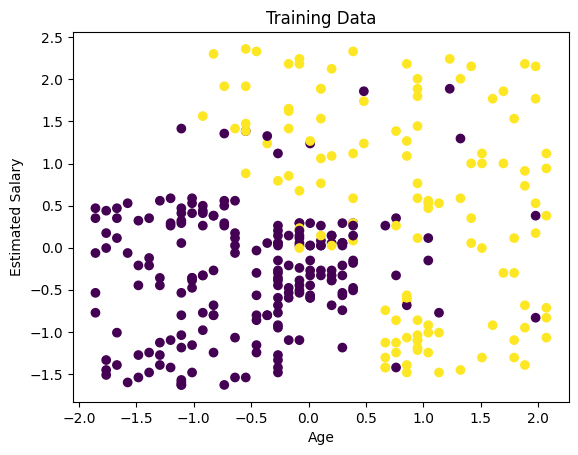

In [13]:
plt.scatter(x_Train[:, 0], x_Train[:, 1],c=y_Train)  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()

SVM Plot

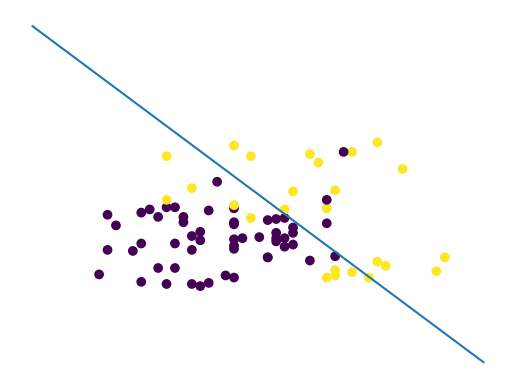

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_Train, y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(x_Test)

# Plot data points
plt.scatter(x_Test[:, 0], x_Test[:, 1],c=y_Test)  

# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]  

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();